In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datasist.structdata import detect_outliers

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)
pd.set_option('mode.chained_assignment', None)

In [2]:
df = pd.read_csv("Sample - Superstore.csv", encoding='windows-1252')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### null values or missing items

In [3]:
#checking the null values or missing items
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

### Removal of outliers

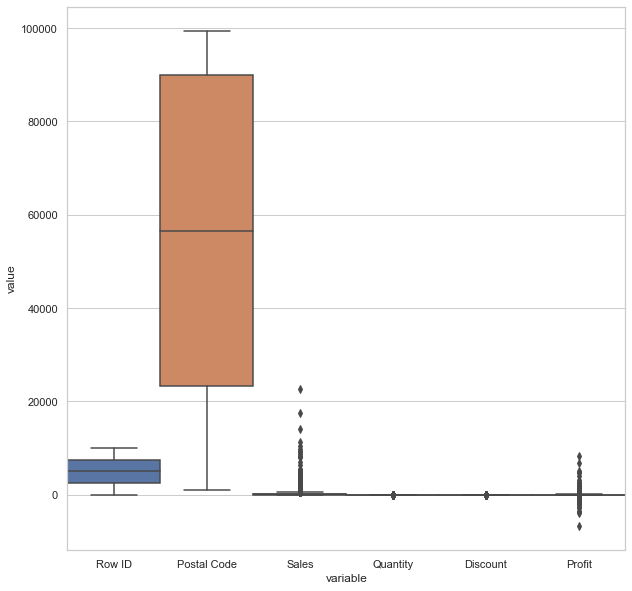

In [5]:
# BoxPlot to see the outliers clearly
df_con=df.select_dtypes(include=[np.number])
sns.set(style="whitegrid")
sns.boxplot(x="variable", y="value", data=pd.melt(df_con), width=1)

plt.show()

In [6]:
# function for Removal of Outliers
def remove_outlier(dataset,k=3.33):
    for col in dataset.columns:
            if (dataset[col].dtype=="int64" or dataset[col].dtype=="float64"):
                mean = dataset[col].mean()
                global ds      
                std = dataset[col].std()    
                outlier = [i for i in dataset[col] if (i > mean - k * std)]
                outlier = [i for i in outlier if (i < mean + k * std)]       
                ds = dataset.loc[dataset[col].isin(outlier)]

In [7]:
remove_outlier(df,k=3.33)

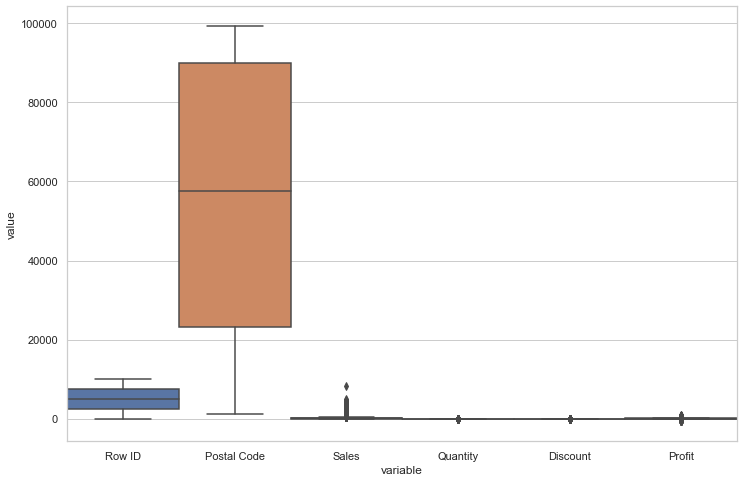

In [8]:
# see the outliers are removed or not
ds_con=ds.select_dtypes(include=[np.number])
plt.figure(figsize=[12,8])
sns.set(style="whitegrid")
sns.boxplot(x="variable", y="value", data=pd.melt(ds_con), width=1)

plt.show()

### Encode dates

In [9]:
def encode_dates(df, column):
    df = df.copy()
    df[column] = pd.to_datetime(df[column])
    df[column + '_year'] = df[column].apply(lambda x: x.year)
    df[column + '_month'] = df[column].apply(lambda x: x.month)
    df[column + '_day'] = df[column].apply(lambda x: x.day)
    df = df.drop(column, axis=1)
    return df

### Work with categorical data

In [10]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

### Final function for feature engineering

In [11]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop unnecessary columns
    df = df.drop(['Row ID', 'Customer Name', 'Country', 'Product Name', 'Postal Code', 'Product ID'], axis=1)
    
    # Drop customer-specific feature columns
    df = df.drop(['Order ID', 'Customer ID'], axis=1)
    
    # Extract date features
    df = encode_dates(df, column='Order Date')
    df = encode_dates(df, column='Ship Date')
    
    # One-hot encode categorical features
    for column in ['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category']:
        df = onehot_encode(df, column=column)
    
    return df

In [12]:
df_preprocessing = preprocess_inputs(df)


In [13]:
df_preprocessing

,Sales,Quantity,Discount,Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,261.9600,2,0.00,41.9136,2016,11,8,2016,11,11,...,0,0,0,0,0,0,0,0,0,0
1,731.9400,3,0.00,219.5820,2016,11,8,2016,11,11,...,0,0,0,0,0,0,0,0,0,0
2,14.6200,2,0.00,6.8714,2016,6,12,2016,6,16,...,0,0,0,1,0,0,0,0,0,0
3,957.5775,5,0.45,-383.0310,2015,10,11,2015,10,18,...,0,0,0,0,0,0,0,0,0,1
4,22.3680,2,0.20,2.5164,2015,10,11,2015,10,18,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,25.2480,3,0.20,4.1028,2014,1,21,2014,1,23,...,0,0,1,0,0,0,0,0,0,0
9990,91.9600,2,0.00,15.6332,2017,2,26,2017,3,3,...,0,0,1,0,0,0,0,0,0,0
9991,258.5760,2,0.20,19.3932,2017,2,26,2017,3,3,...,0,0,0,0,0,0,1,0,0,0
9992,29.6000,4,0.00,13.3200,2017,2,26,2017,3,3,...,0,0,0,0,0,1,0,0,0,0
